# Linear Regression with Tensorflow for Temperature and Ice Cream Sales

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [325]:
dataset = pd.read_csv(r"D:\tensorflow_labs\Labs\icecreate_dataset\Ice Cream Sales - temperatures.csv")

In [326]:
dataset.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [327]:
dataset.info

<bound method DataFrame.info of      Temperature  Ice Cream Profits
0             39              13.17
1             40              11.88
2             41              18.82
3             42              18.65
4             43              17.02
..           ...                ...
360           99              85.13
361           99              87.08
362           99              89.29
363          101              81.91
364          101              85.02

[365 rows x 2 columns]>

In [328]:
dataset.count()

Temperature          365
Ice Cream Profits    365
dtype: int64

In [329]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,71.980822,13.258510,39.00,63.00,73.00,82.00,101.00
Ice Cream Profits,365.0,52.103616,15.989004,11.88,40.65,53.62,63.63,89.29


In [330]:
dataset.isnull().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

Text(0.5, 1.0, 'Temperature vs Profits')

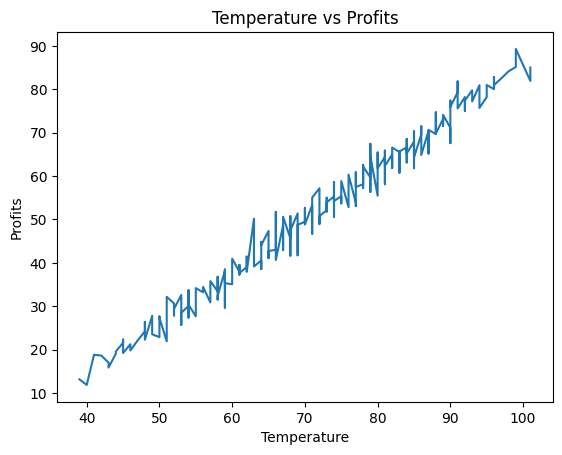

In [331]:
# Visualizing the relationship between 2 variables
plt.plot(dataset['Temperature'],dataset['Ice Cream Profits'])
plt.xlabel("Temperature")
plt.ylabel("Profits")
plt.title("Temperature vs Profits")

In [332]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataset['Temperature'],dataset['Ice Cream Profits'], test_size=0.2, random_state=42)

In [343]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(15,activation='linear'),
     tf.keras.layers.Dense(5,activation='linear'),
    tf.keras.layers.Dense(1)
]
)

In [344]:

model_1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # Possible values are SGD,RMSprop
              metrics=["mae"]) # possible values are mse

In [345]:
history=model_1.fit(X_train,y_train,epochs=200,verbose=0)

In [346]:
model_1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 15)                30        
                                                                 
 dense_54 (Dense)            (None, 5)                 80        
                                                                 
 dense_55 (Dense)            (None, 1)                 6         
                                                                 
Total params: 116 (464.00 Byte)
Trainable params: 116 (464.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

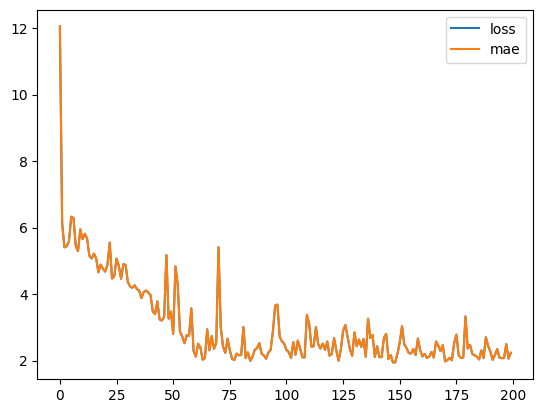

In [347]:
# To plot the MAE and Loss values
pd.DataFrame(history.history).plot()

In [348]:
# Evaluating the model
model_1.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 1.9150 - mae: 1.9150


[1.9150301218032837, 1.9150301218032837]

In [349]:
prediucted_values = model_1.predict(X_test)


3/3 [==============================] - 0s 2ms/step


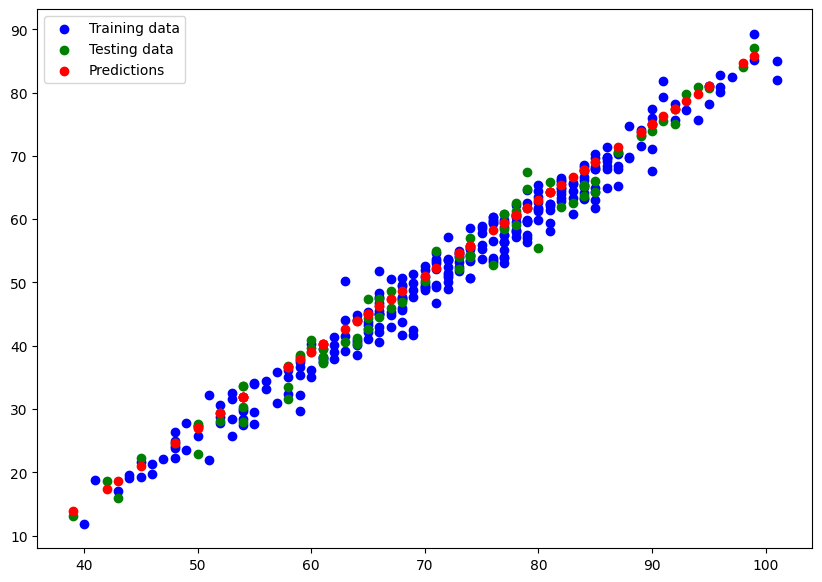

In [350]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.scatter(X_test, prediucted_values, c="r", label="Predictions")
plt.legend();

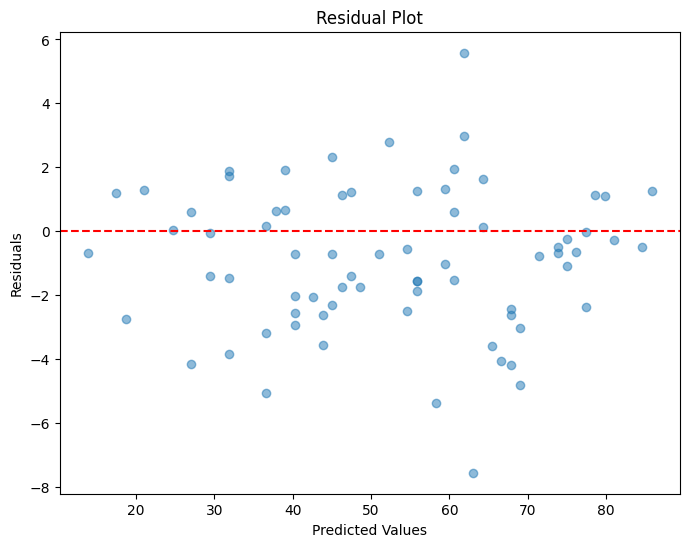

In [351]:
# Calculate residuals
y_true = y_test.values.flatten() # To convert dataframe with single col to ndarray 
residuals = y_true - prediucted_values.flatten() # To expand the ndarray [[],[]] to []

# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(prediucted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()